In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle
import os

In [108]:
def positions_to_relative(positions,d=10,y0=2,z0=2):
    ys=positions[:,1]
    zs=positions[:,2]
    ymax,ymin=np.max(ys),np.min(ys)
    zmax,zmin=np.max(zs),np.min(zs)
    yrel_pos=(y0+ys-ymin)/d
    zrel_pos=(z0+zs-zmin)/d
    rel_pos=np.array([yrel_pos,zrel_pos])
    return rel_pos.T 
def ys_zs(positions):
    ys=np.unique(positions[:,1])
    zs=np.unique(positions[:,2])
    return(len(ys),len(zs))

In [171]:
Path="C:/Users/mikel/LaserLab Dropbox/Proyectos/data/CMOS2/ITO/BOLD_131_B1/BOLD_131_B1_FREE_P16_20220916/"
os.listdir(Path)

['Dark',
 'Filter1',
 'FocusOut',
 'Point1',
 'Point10',
 'Point11',
 'Point12',
 'Point13',
 'Point14',
 'Point15',
 'Point16',
 'Point2',
 'Point3',
 'Point4',
 'Point5',
 'Point6',
 'Point7',
 'Point8',
 'Point9',
 'Positions']

In [172]:
Positions=Path+'Positions/xyz.csv'
PosArray=np.loadtxt(Positions,delimiter=',')
rel_pos=positions_to_relative(PosArray)

# Posiciones reales en la muestra

No esta determinado el punto en el que se situa el grid

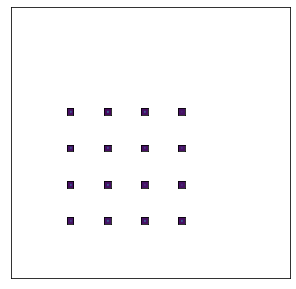

In [173]:
filt=7
fig, ax = plt.subplots(figsize=(5,5))
plt.xticks([]),plt.yticks([])
rel_size=1/40
point=1
for pos in rel_pos:
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    ins = ax.inset_axes([pos[0],pos[1],rel_size,rel_size])
    ins.imshow(imagearray)
    ins.set_xticks([]),ins.set_yticks([])
    point+=1
plt.show()

# Imagenes juntas

In [174]:
filt=6

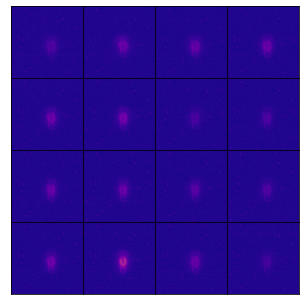

In [175]:
ncol,nrow=ys_zs(PosArray)
fig, axes = plt.subplots(ncol,nrow, sharex=True, sharey=True,figsize=(ncol,nrow))
fig.subplots_adjust(0,0,1,1,0,0)
point=1
for ax in axes.flat:
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    ax.imshow(imagearray,cmap='plasma',vmin=1600,vmax=3000)
    ax.set_xticks([]),ax.set_yticks([])
    point+=1


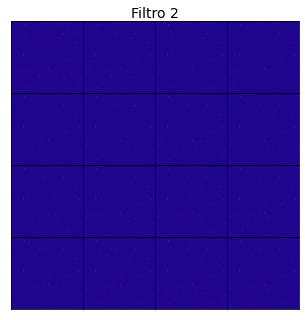

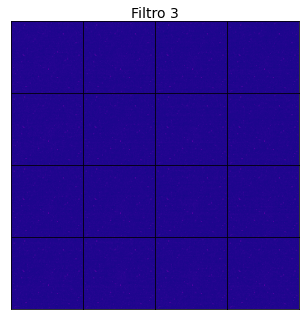

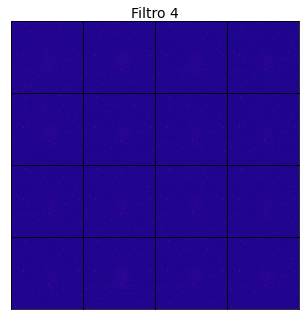

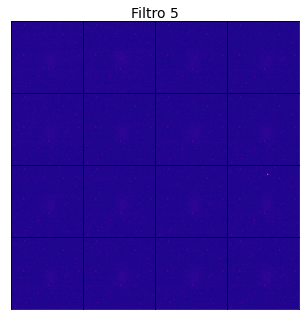

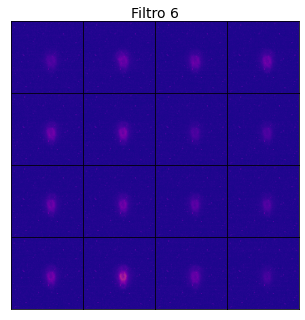

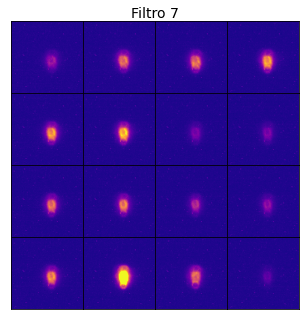

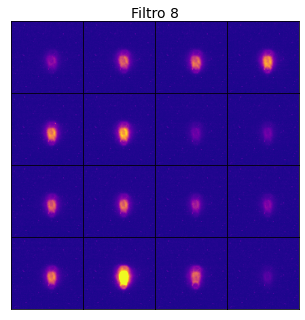

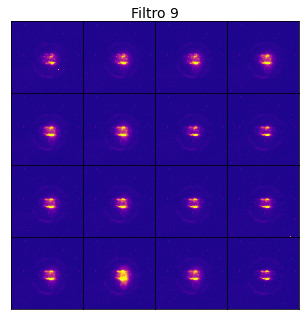

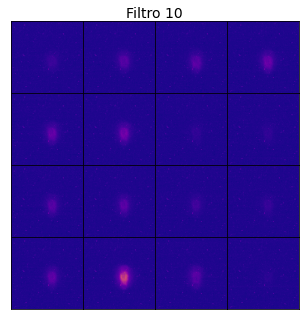

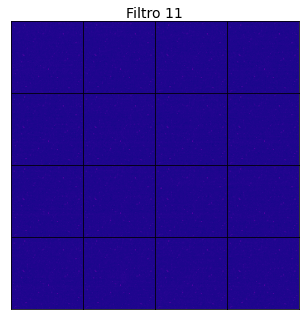

In [176]:
ncol,nrow=ys_zs(PosArray)
for filt in range(2,12):
    fig, axes = plt.subplots(ncol,nrow, sharex=True, sharey=True,figsize=(ncol,nrow))
    fig.subplots_adjust(0,0,1,1,0,0)
    plt.suptitle("Filtro {}".format(filt), fontsize=14,y=1.05)
    point=1
    for ax in axes.flat:
        image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
        imagearray=np.loadtxt(image)[140:310,170:340]
        ax.imshow(imagearray,cmap='plasma',vmin=1600,vmax=3000)
        ax.set_xticks([]),ax.set_yticks([])
        point+=1